## Biodiversity Project

You are a biodiversity analyst working for the National Parks Service. You're going to help them analyze some data about species at various national parks.

The data that you'll be working with for this project is inspired by real data, but is mostly fictional.

*Note: I have used the old version of this project as a guide*

#### 1. Import the libraries

In [14]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

#### 2. Load the datasets
The first dataset contains the different species in our National Parks, including:

- The scientific name of each species
- The common names of each species
- The species conservation status

The second dataset contains the recording sightings of different species at several national parks for the past 7 days.

In [105]:
species = pd.read_csv('species_info.csv')

In [106]:
observations  = pd.read_csv('observations.csv')

#### 3. Explore and Explain Data
##### A. Species

In [107]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [6]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [8]:
species.isnull().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [9]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Canis lupus,Dicranum Moss,Species of Concern
freq,4470,3,7,161


In [13]:
print(species.category.unique())
print(species.category.nunique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
7


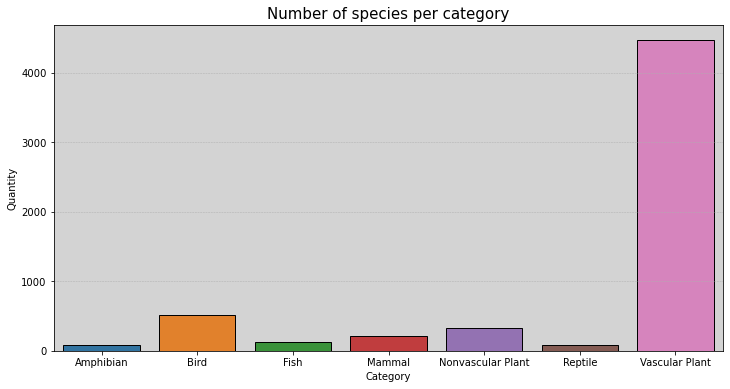

In [138]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
ax = sns.countplot(df.category, edgecolor = 'black')
ax.set_facecolor('lightgrey')
ax.grid(axis = 'y', linestyle = '--', linewidth=0.5)
ax.set_title('Number of species per category', fontsize = 15)
ax.set_ylabel('Quantity')
ax.set_xlabel('Category')
plt.show()

The first dataset (species): 
- Presents 5824 instances in 7 categories of different species, where the vascular plant is the category with the largest number of records.
- Contains 5633 null records in its attribute `conservation_status`. 

I will start replacing the missing data in `conservation_status` with the string 'No Intervention'. Then, I will analize the conservation status of the species. 

In [143]:
# Checking the conservation status.
species.conservation_status.fillna('No Intervention', inplace = True)
cons_status = species.groupby('conservation_status').scientific_name.nunique().reset_index()
cons_status = cons_status.sort_values(by='scientific_name').reset_index(drop=True)
cons_status.columns = ['Conservation Status', 'Count']
cons_status

,Conservation Status,Count
0,In Recovery,4
1,Threatened,10
2,Endangered,15
3,Species of Concern,151
4,No Intervention,5363


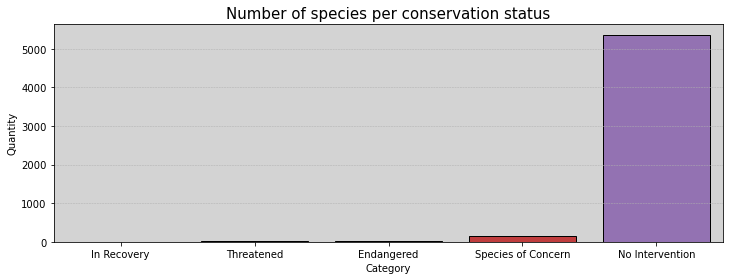

In [139]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot()
ax = sns.barplot(data = cons_status, x = 'conservation_status', y = 'scientific_name', edgecolor = 'black')
ax.set_facecolor('lightgrey')
ax.grid(axis = 'y', linestyle = '--', linewidth=0.5)
ax.set_title('Number of species per conservation status', fontsize = 15)
ax.set_ylabel('Quantity')
ax.set_xlabel('Category')
plt.show()

It is possible to observe how the number of animals without intervention is much greater than the other conservation states of the species.

I will create a new table that classifies the species as "protected" and "not_protected". Then I will proceed to analyze what percentage of each species is within the "unprotected" category.

In [91]:
species['is_protected'] = species.conservation_status != 'No Intervention'

category_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()

category_pivot = category_counts.pivot(columns='is_protected', 
                                       index='category', 
                                       values='scientific_name').reset_index()

category_pivot.columns = ['category', 'not_protected', 'protected']

category_pivot

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [93]:
category_pivot['percent_protected'] = category_pivot.protected / (category_pivot.protected + category_pivot.not_protected)
category_pivot

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,0.088608
1,Bird,413,75,0.153689
2,Fish,115,11,0.087302
3,Mammal,146,30,0.170455
4,Nonvascular Plant,328,5,0.015015
5,Reptile,73,5,0.064103
6,Vascular Plant,4216,46,0.010793


Species in category Mammal are more likely to be endangered than species in Bird. I'm going to do a significance test to see if this statement is true.

In [94]:
contingency = [[30, 146],
              [75, 413]]

In [95]:
from scipy.stats import chi2_contingency
_, pval, _, _ = chi2_contingency(contingency)

In [104]:
if pval < 0.05:
    print('The p value is {d} and it is smaller than a significance level of 0.05.'.format(d = round(pval, 3))) 
    print('So the Mammal are not more likely to be endangered than Birds')
else: 
    print('The p value is {d} and it is bigger than a significance level of 0.05.'.format(d = round(pval, 3)))
    print('So the Mammal are more likely to be endangered than Birds')

The p value is 0.688 and it is bigger than a significance level of 0.05.
So the Mammal are more likely to be endangered than Birds


##### B. Observations

In [108]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [18]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [22]:
observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [72]:
df = observations.groupby('scientific_name').observations.sum()
df = pd.DataFrame(df).sort_values(by = ['observations'], ascending =False)
df.head()

,observations
scientific_name,
Streptopelia decaocto,1785
Holcus lanatus,1780
Castor canadensis,1725
Hypochaeris radicata,1720
Puma concolor,1711


In [20]:
observations.isnull().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

In [29]:
observations.park_name.nunique()

4

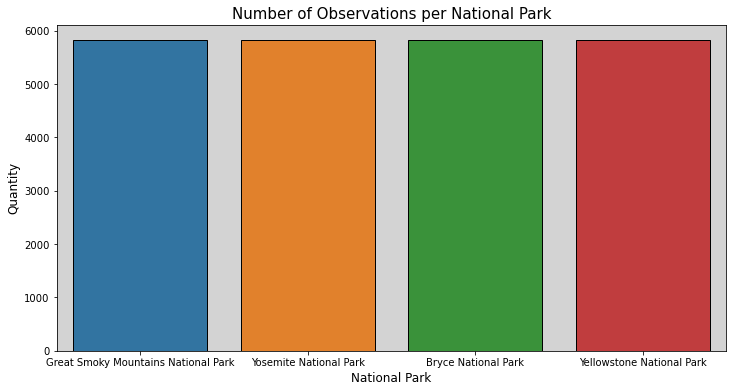

In [149]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
ax = sns.countplot(observations.park_name, edgecolor='black')
ax.set_facecolor('lightgrey')
ax.set_title('Number of Observations per National Park', fontsize = 15)
ax.set_ylabel('Quantity', fontsize = 12)
ax.set_xlabel('National Park', fontsize = 12)
plt.show()

In [33]:
observations.park_name.value_counts()

Yellowstone National Park              5824
Bryce National Park                    5824
Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Name: park_name, dtype: int64

The second data set:
- Presents 23296 records of observations evenly distributed in 4 national parks.
- It does not have missing values.
- Streptopelia decaocto with 1785 views is the species with the highest number of sightings

I will proceed to corroborate how many times the different species of sheep have been sighted in each national park.

In [110]:
species['is_sheep'] = species.common_names.apply(lambda x: 'Sheep' in x)
species[species.is_sheep]

,category,scientific_name,common_names,conservation_status,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN,True
1139,Vascular Plant,Rumex acetosella,"Sheep Sorrel, Sheep Sorrell",NaN,True
2233,Vascular Plant,Festuca filiformis,Fineleaf Sheep Fescue,NaN,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True
3758,Vascular Plant,Rumex acetosella,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",NaN,True
3761,Vascular Plant,Rumex paucifolius,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",NaN,True
4091,Vascular Plant,Carex illota,"Sheep Sedge, Smallhead Sedge",NaN,True
4383,Vascular Plant,Potentilla ovina var. ovina,Sheep Cinquefoil,NaN,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True


Many of the results are actually plants. I will choose only the Mammal and merge `heep_species` with `observations` to get a dataframe with observations of sheep.

In [111]:
sheep_species = species[(species.is_sheep) & (species.category =='Mammal')]
sheep_species

,category,scientific_name,common_names,conservation_status,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True


In [112]:
sheep_observations = pd.merge(observations,sheep_species)
sheep_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_sheep
0,Ovis canadensis,Yellowstone National Park,219,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True
1,Ovis canadensis,Bryce National Park,109,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True
2,Ovis canadensis,Yosemite National Park,117,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True
3,Ovis canadensis,Great Smoky Mountains National Park,48,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True
4,Ovis canadensis sierrae,Yellowstone National Park,67,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True
5,Ovis canadensis sierrae,Yosemite National Park,39,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True
6,Ovis canadensis sierrae,Bryce National Park,22,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True
7,Ovis canadensis sierrae,Great Smoky Mountains National Park,25,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True
8,Ovis aries,Yosemite National Park,126,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN,True
9,Ovis aries,Great Smoky Mountains National Park,76,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN,True


I will use groupby to get the sum of observations for each park_name

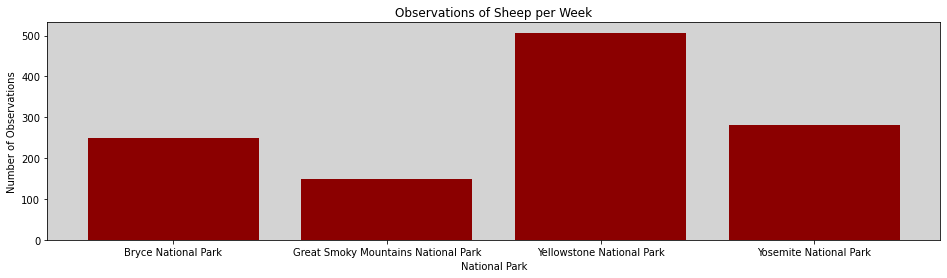

,park_name,observations
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149
2,Yellowstone National Park,507
3,Yosemite National Park,282


In [114]:
obs_by_park = sheep_observations.groupby('park_name').observations.sum().reset_index()

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot()
ax.bar(range(len(obs_by_park)), obs_by_park.observations, color='darkred')
ax.set_facecolor('lightgrey')
ax.set_xticks(range(len(obs_by_park)))
ax.set_xticklabels(obs_by_park.park_name)
ax.set_ylabel('Number of Observations')
ax.set_xlabel('National Park')
ax.set_title('Observations of Sheep per Week')
plt.show()

obs_by_park

We can observe that in Yellowstone National Park is possible te see more sheeps than the others park.